# Que-1. Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.


Data Set : 50_Startups

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings('ignore')

In [ ]:
dataset = pd.read_csv('50_Startups.csv')
dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
#EDA & Visualization:-

In [ ]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
dataset.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [ ]:
dataset.shape

(50, 5)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
dataset.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [ ]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
dataset.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [ ]:
data = dataset.rename({'R&D Spend':'RnD_Spend','Marketing Spend':'M_Spend'},axis = 1)
data
data.head()

,RnD_Spend,Administration,M_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Correlation:

In [ ]:
#correlation matrix

In [ ]:
data.corr()

,RnD_Spend,Administration,M_Spend,Profit
RnD_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
M_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


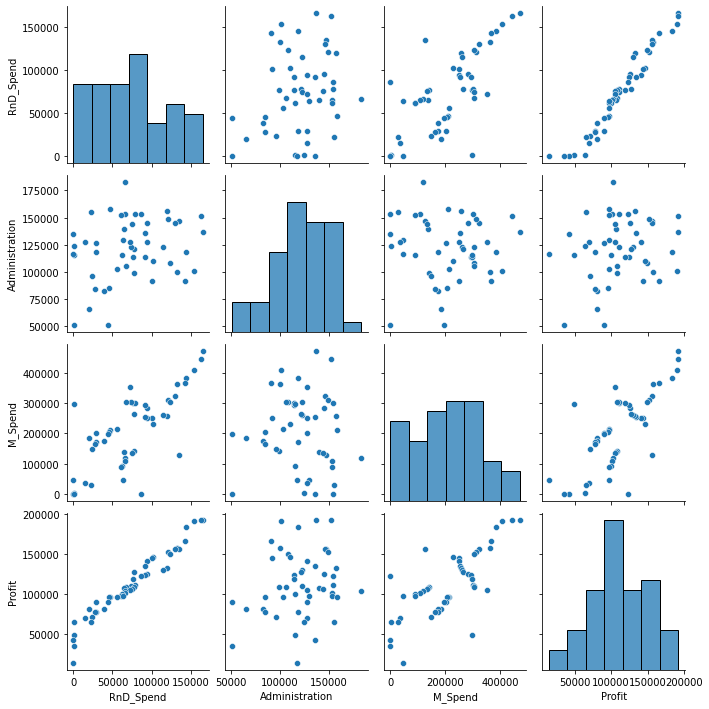

In [ ]:
sns.pairplot(data = data.iloc[:,:])
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f986f800310>,
      dtype=object)

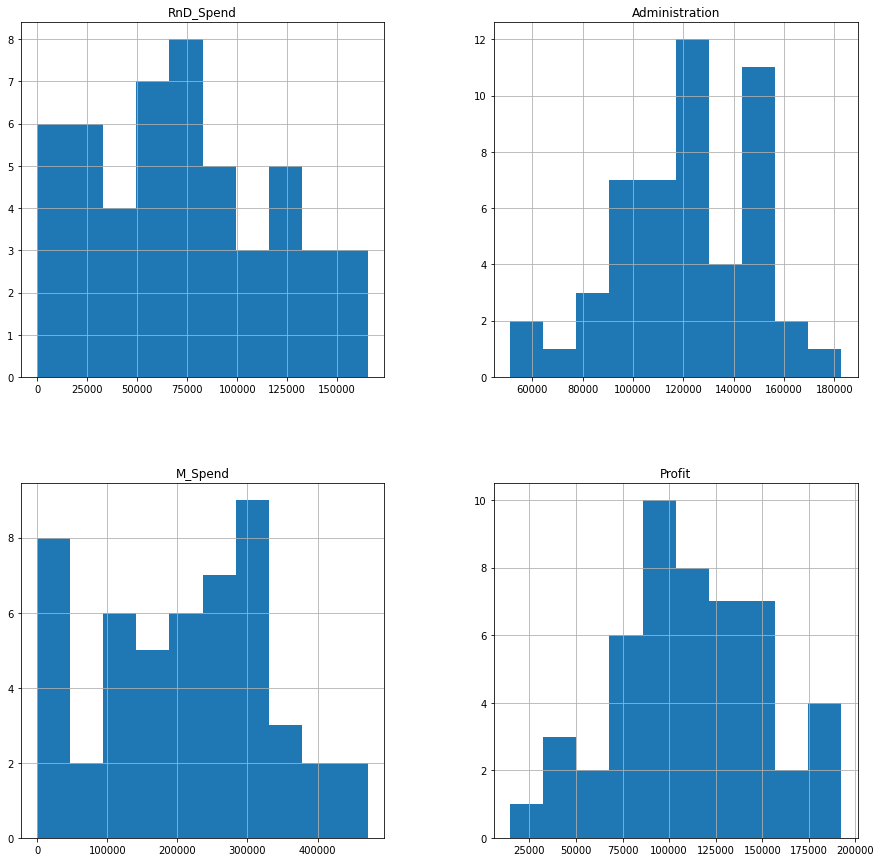

In [ ]:
data.hist(figsize=(15,15))

 Linearity Testing:

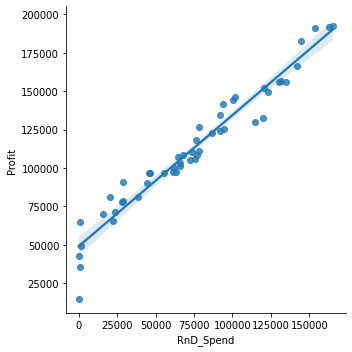

In [ ]:
sns.lmplot(x = 'RnD_Spend', y = 'Profit', data = data)
plt.show()

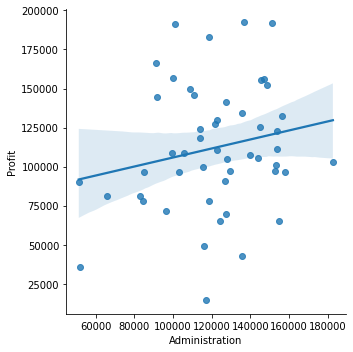

In [ ]:
sns.lmplot(x = 'Administration', y = 'Profit', data = data)
plt.show()

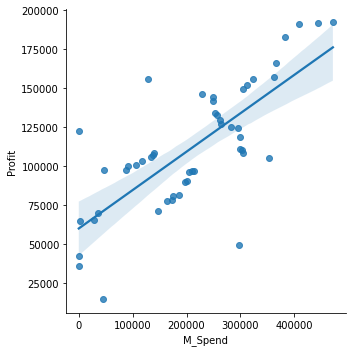

In [ ]:
sns.lmplot(x = 'M_Spend', y = 'Profit', data = data)
plt.show()

Hence Linearity Test is Failed. Because not all inputs are having the linear relationship with output.

In [ ]:
#Normality Test:

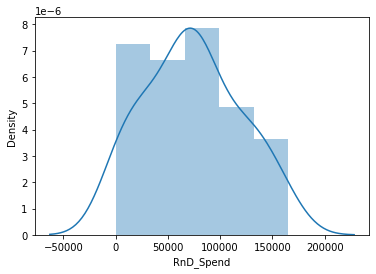

In [ ]:
sns.distplot(data['RnD_Spend'])
plt.show()

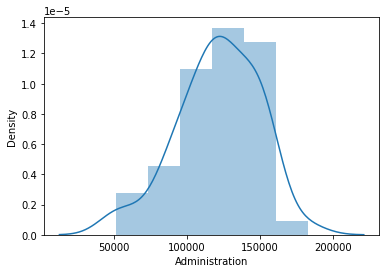

In [ ]:
sns.distplot(data['Administration'])
plt.show()

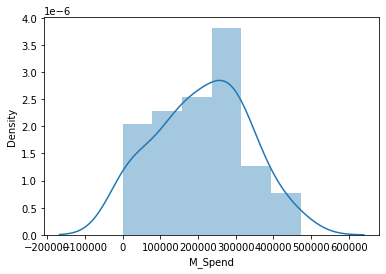

In [ ]:
sns.distplot(data['M_Spend'])
plt.show()

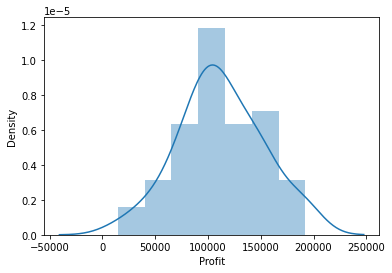

In [ ]:
sns.distplot(data['Profit'])
plt.show()

Hence Normality Test is Passed. Because from the above plots we can say that input data is fairly symmetrical.

In [ ]:
#Model Building || 6. Model Training

In [ ]:
data.columns

Index(['RnD_Spend', 'Administration', 'M_Spend', 'State', 'Profit'], dtype='object')

In [ ]:
data_model = smf.ols(formula = 'Profit~RnD_Spend+Administration+M_Spend', data = data).fit()
data_model

In [ ]:
#data_model 

In [ ]:
data_model.params

Intercept         50122.192990
RnD_Spend             0.805715
Administration       -0.026816
M_Spend               0.027228
dtype: float64

In [ ]:
data_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 19 Oct 2022   Prob (F-statistic):           4.53e-30
Time:                        18:11:35   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RnD_Spend          0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
M_Spend            0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Model_1:

In [ ]:
data_model_1 = smf.ols(formula = 'Profit~RnD_Spend', data = data).fit()
print('R2Score     :',data_model_1.rsquared.round(4)) 
print('Adj.R2Score :',data_model_1.rsquared_adj.round(4))
print('AIC Value   :',data_model_1.aic.round(4)) 
print('BIC Value   :',data_model_1.bic.round(4)) 
print('P-Value     :\n',data_model_1.pvalues)
print('t-value     :\n',data_model_1.tvalues)

R2Score     : 0.9465
Adj.R2Score : 0.9454
AIC Value   : 1058.873
BIC Value   : 1062.6971
P-Value     :
 Intercept    2.782697e-24
RnD_Spend    3.500322e-32
dtype: float64
t-value     :
 Intercept    19.320288
RnD_Spend    29.151139
dtype: float64


In [ ]:
data_model_1.params

Intercept    49032.899141
RnD_Spend        0.854291
dtype: float64

In [ ]:
data_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Wed, 19 Oct 2022   Prob (F-statistic):           3.50e-32
Time:                        18:12:05   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
RnD_Spend      0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Model 2:

In [ ]:
data_model_2 = smf.ols(formula = 'Profit~RnD_Spend+Administration', data = data).fit()
print('R2Score     :',data_model_2.rsquared.round(4)) 
print('Adj.R2Score :',data_model_2.rsquared_adj.round(4))
print('AIC Value   :',data_model_2.aic.round(4)) 
print('BIC Value   :',data_model_2.bic.round(4)) 
print('P-Value     :\n',data_model_2.pvalues)
print('t-value     :\n',data_model_2.tvalues)

R2Score     : 0.9478
Adj.R2Score : 0.9456
AIC Value   : 1059.6637
BIC Value   : 1065.3998
P-Value     :
 Intercept         5.695336e-12
RnD_Spend         2.278348e-31
Administration    2.888932e-01
dtype: float64
t-value     :
 Intercept          9.122352
RnD_Spend         28.588870
Administration    -1.072677
dtype: float64


In [ ]:
data_model_2.params

Intercept         54886.620628
RnD_Spend             0.862118
Administration       -0.052995
dtype: float64

In [ ]:
data_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     426.8
Date:                Wed, 19 Oct 2022   Prob (F-statistic):           7.29e-31
Time:                        18:12:33   Log-Likelihood:                -526.83
No. Observations:                  50   AIC:                             1060.
Df Residuals:                      47   BIC:                             1065.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.489e+04   6016.718      9.122      0.000    4.28e+04     6.7e+04
RnD_Spend          0.8621      0.030     28.589      0.000       0.801       0.923
Administration    -0.0530      0.049     -1.073      0.289      -0.152       0.046
==============================================================================
Omnibus:                       14.678   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.449
Skew:                          -0.961   Prob(JB):                     3.63e-05
Kurtosis:                       5.474   Cond. No.                     6.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Model 3:

In [ ]:
data_model_3 = smf.ols(formula = 'Profit~RnD_Spend+Administration+M_Spend', data = data).fit()
print('R2Score     :',data_model_3.rsquared.round(4)) 
print('Adj.R2Score :',data_model_3.rsquared_adj.round(4))
print('AIC Value   :',data_model_3.aic.round(4)) 
print('BIC Value   :',data_model_3.bic.round(4)) 
print('P-Value     :\n',data_model_3.pvalues)
print('t-value     :\n',data_model_3.tvalues)

R2Score     : 0.9507
Adj.R2Score : 0.9475
AIC Value   : 1058.7715
BIC Value   : 1066.4196
P-Value     :
 Intercept         1.057379e-09
RnD_Spend         2.634968e-22
Administration    6.017551e-01
M_Spend           1.047168e-01
dtype: float64
t-value     :
 Intercept          7.626218
RnD_Spend         17.846374
Administration    -0.525507
M_Spend            1.655077
dtype: float64


In [ ]:
data_model_3.params

Intercept         50122.192990
RnD_Spend             0.805715
Administration       -0.026816
M_Spend               0.027228
dtype: float64

In [ ]:
data_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 19 Oct 2022   Prob (F-statistic):           4.53e-30
Time:                        18:12:43   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RnD_Spend          0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
M_Spend            0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Measuring Variance Inflation Factor (VIF) :-

In [ ]:
Rsq_profit = smf.ols('Profit~RnD_Spend+Administration+M_Spend',data = data).fit().rsquared  
VIF_profit = 1/(1-Rsq_profit) 

Rsq_RDspend = smf.ols('RnD_Spend~Profit+Administration+M_Spend',data = data).fit().rsquared  
VIF_RDspend = 1/(1-Rsq_RDspend) 

Rsq_Admin = smf.ols('Administration~Profit+RnD_Spend+M_Spend',data = data).fit().rsquared  
VIF_Admin = 1/(1-Rsq_Admin)

Rsq_MSpend = smf.ols('M_Spend~Administration+Profit+RnD_Spend',data = data).fit().rsquared  
VIF_MSpend = 1/(1-Rsq_MSpend)

# Storing VIF values in a data frame
frame = {'Variables':['profit','RnD_Spend','Administration','M_Spend'],'VIF':[VIF_profit,VIF_RDspend,VIF_Admin,VIF_MSpend]}
VIF_frame = pd.DataFrame(frame)  
VIF_frame

,Variables,VIF
0,profit,20.302917
1,RnD_Spend,19.563001
2,Administration,1.182146
3,M_Spend,2.465332


In [ ]:
# Model Testing - Residual Analysis

In [ ]:
#Normality of Residuals (Q-Q plot):

In [ ]:
import statsmodels.api as sm

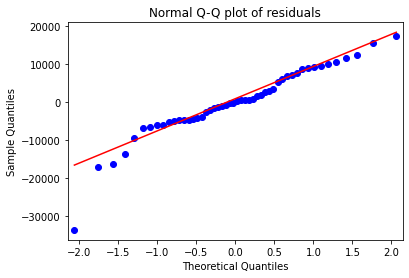

In [ ]:
qq_plot = sm.qqplot(data = data_model.resid , line = 'q' )
plt.title('Normal Q-Q plot of residuals')
plt.show()

In [ ]:
list(np.where(data_model.resid < -30000))

[array([49])]

In [ ]:
#Residual Plot for Homoscedasticity:

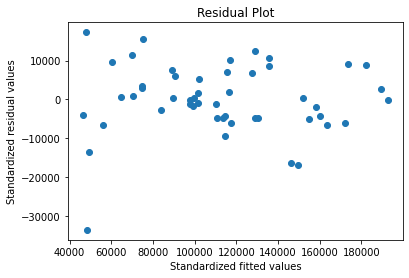

In [ ]:
plt.scatter((data_model.fittedvalues),(data_model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [ ]:
#Residual Vs Regressors:

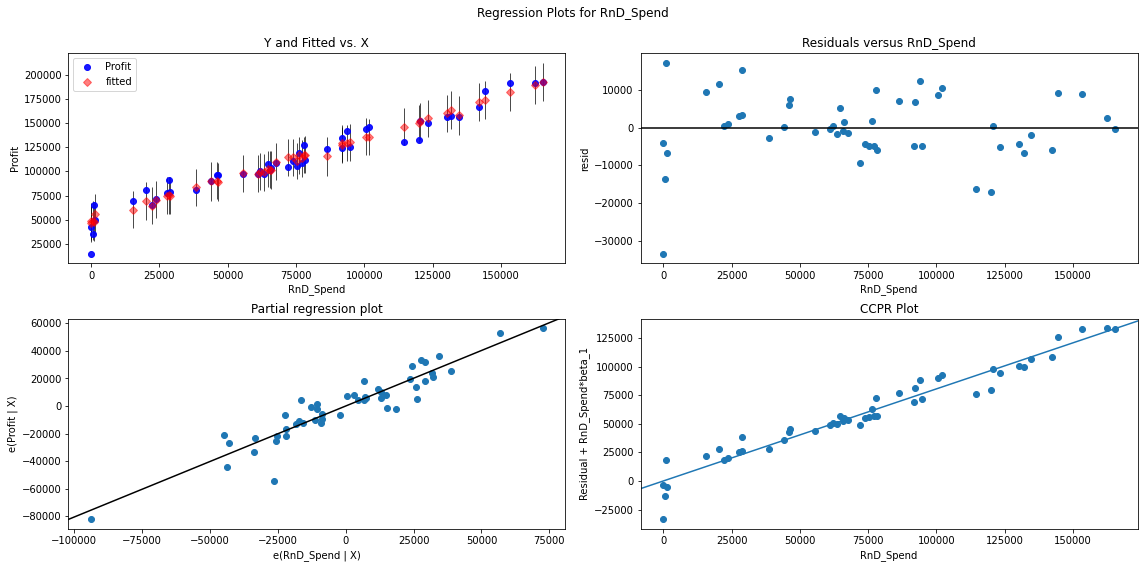

In [ ]:
figsize = plt.figure(figsize = (16,8))
figsize = sm.graphics.plot_regress_exog(data_model,'RnD_Spend',fig = figsize)
plt.show()

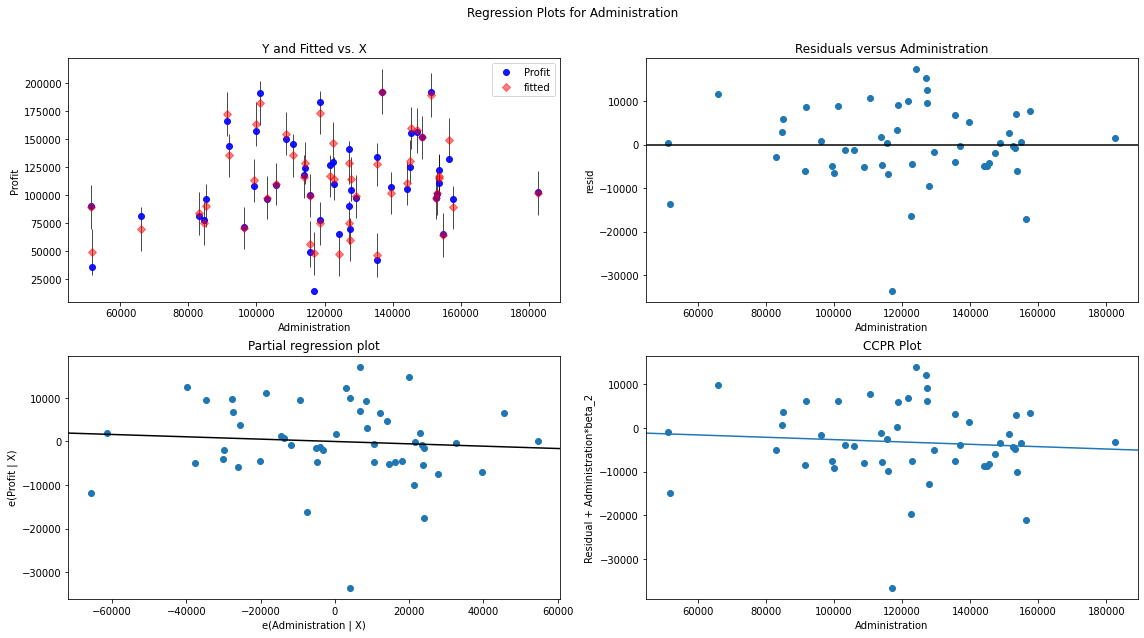

In [ ]:
figsize = plt.figure(figsize = (16,9))
figsize = sm.graphics.plot_regress_exog(data_model,'Administration',fig = figsize)
plt.show()

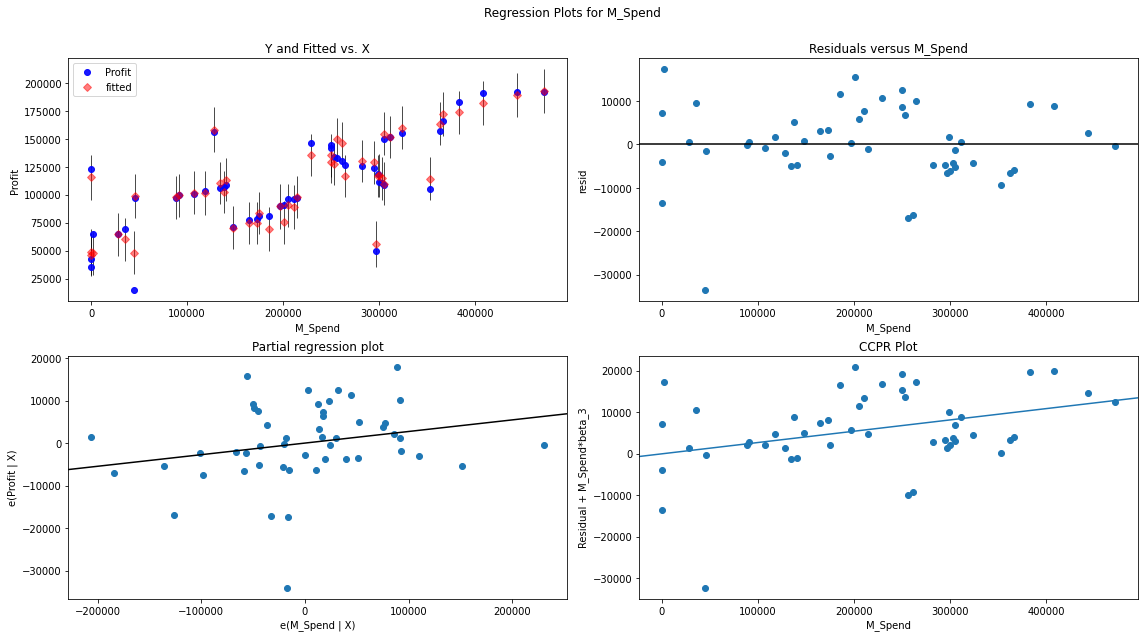

In [ ]:
figsize = plt.figure(figsize = (16,9))
figsize = sm.graphics.plot_regress_exog(data_model,'M_Spend',fig = figsize)
plt.show()

In [ ]:
#Model Deletion Dignostics:

In [ ]:
#Detecting influencers/outliers

In [ ]:
#Using Cook's Distance

In [ ]:
model_influencers = data_model.get_influence()
(a,_) = model_influencers.cooks_distance

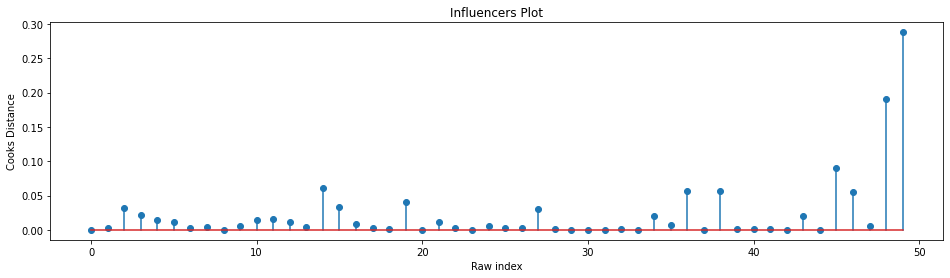

In [ ]:
#Plot the influencers values using stem plot
plt.subplots(figsize = (16,4))
plt.stem(np.arange(len(data)),np.round(a,3))
plt.title('Influencers Plot')
plt.xlabel('Raw index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
#Index and values of influencer
(np.argmax(a), np.max(a))

(49, 0.2880822927543272)

In [ ]:
#High Influence Point

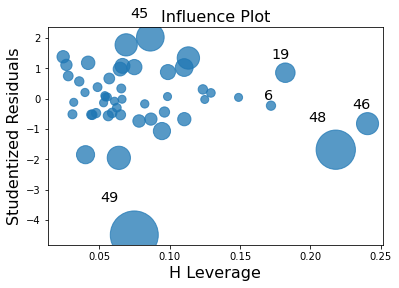

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(data_model)
plt.show()

In [ ]:
k = data.shape[1]
n = data.shape[0]
leverage_cutoff = 3*((k + 1)/n)

 Checking if there is any improvement in the Rsquare and AIC if we delete State variable

In [ ]:
#Deleting State Column:

In [ ]:
copy = data.copy()
copy.head()

,RnD_Spend,Administration,M_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
data_1 = copy.drop('State', axis = 1)
data_1
data_1.head()

,RnD_Spend,Administration,M_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [ ]:
#Model 4:

In [ ]:
data_model_4 = smf.ols('Profit~RnD_Spend+Administration+M_Spend',data = data_1).fit()
data_model_4

In [ ]:
data_model_4.params

Intercept         50122.192990
RnD_Spend             0.805715
Administration       -0.026816
M_Spend               0.027228
dtype: float64

In [ ]:
data_model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 19 Oct 2022   Prob (F-statistic):           4.53e-30
Time:                        18:14:17   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RnD_Spend          0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
M_Spend            0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Deleting 49th row:

In [ ]:
data[data.index.isin([49])]

,RnD_Spend,Administration,M_Spend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [ ]:
data_2 = copy.drop(copy.index[[49]],axis = 0)
data_2

,RnD_Spend,Administration,M_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
#Model 5:

In [ ]:
data_2.columns

Index(['RnD_Spend', 'Administration', 'M_Spend', 'State', 'Profit'], dtype='object')

In [ ]:
data_model_5 = smf.ols(formula = 'Profit~RnD_Spend+Administration+M_Spend', data = data_2).fit()
data_model_5

In [ ]:
data_model_5.params

Intercept         52382.439251
RnD_Spend             0.783002
Administration       -0.022201
M_Spend               0.025234
dtype: float64

In [ ]:
data_model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Wed, 19 Oct 2022   Prob (F-statistic):           8.85e-32
Time:                        18:17:47   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RnD_Spend          0.7830      0.038     20.470      0.000       0.706       0.860
Administration    -0.0222      0.043     -0.518      0.607      -0.109       0.064
M_Spend            0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Predicting For New Data:

In [ ]:
#New data for prediction
new_data = pd.DataFrame({'RnD_Spend':150000, "Administration": 100000, "M_Spend":900000}, index = [1])
new_data

,RnD_Spend,Administration,M_Spend
1,150000,100000,900000


In [ ]:
data_model_5.predict(new_data)

1    190322.845555
dtype: float64

In [ ]:
#After Deleting 49th row we get highest Rsquare = 0.961 
#comparatively others

In [ ]:
#and profit for given dataset = 190322.845555
# so model 5 is the best model to predict for profit of 50_startups data.

# Que 2 -Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

Data Set : Toyota Corolla

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('ToyotaCorolla.csv',encoding = 'latin1')
data

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [ ]:
data.shape

(1436, 38)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [ ]:
#check for missing values
data.isna().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [ ]:
data.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.dtypes

Id                   int64
Model               object
Price                int64
Age_08_04            int64
Mfg_Month            int64
Mfg_Year             int64
KM                   int64
Fuel_Type           object
HP                   int64
Met_Color            int64
Color               object
Automatic            int64
cc                   int64
Doors                int64
Cylinders            int64
Gears                int64
Quarterly_Tax        int64
Weight               int64
Mfr_Guarantee        int64
BOVAG_Guarantee      int64
Guarantee_Period     int64
ABS                  int64
Airbag_1             int64
Airbag_2             int64
Airco                int64
Automatic_airco      int64
Boardcomputer        int64
CD_Player            int64
Central_Lock         int64
Powered_Windows      int64
Power_Steering       int64
Radio                int64
Mistlamps            int64
Sport_Model          int64
Backseat_Divider     int64
Metallic_Rim         int64
Radio_cassette       int64
T

In [ ]:
#Filtering Data:-

In [ ]:
details = pd.concat([data.iloc[:,2:4],data.iloc[:,6:7],data.iloc[:,8:9],data.iloc[:,12:14],data.iloc[:,15:18]],axis = 1)
details

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
rename_data = details.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis = 1)
rename_data

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
rename_data[rename_data.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [ ]:
imp_data = rename_data.drop_duplicates().reset_index(drop = True)
imp_data

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
imp_data.describe()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


In [ ]:
#Correlation Matrix:

In [ ]:
imp_data.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


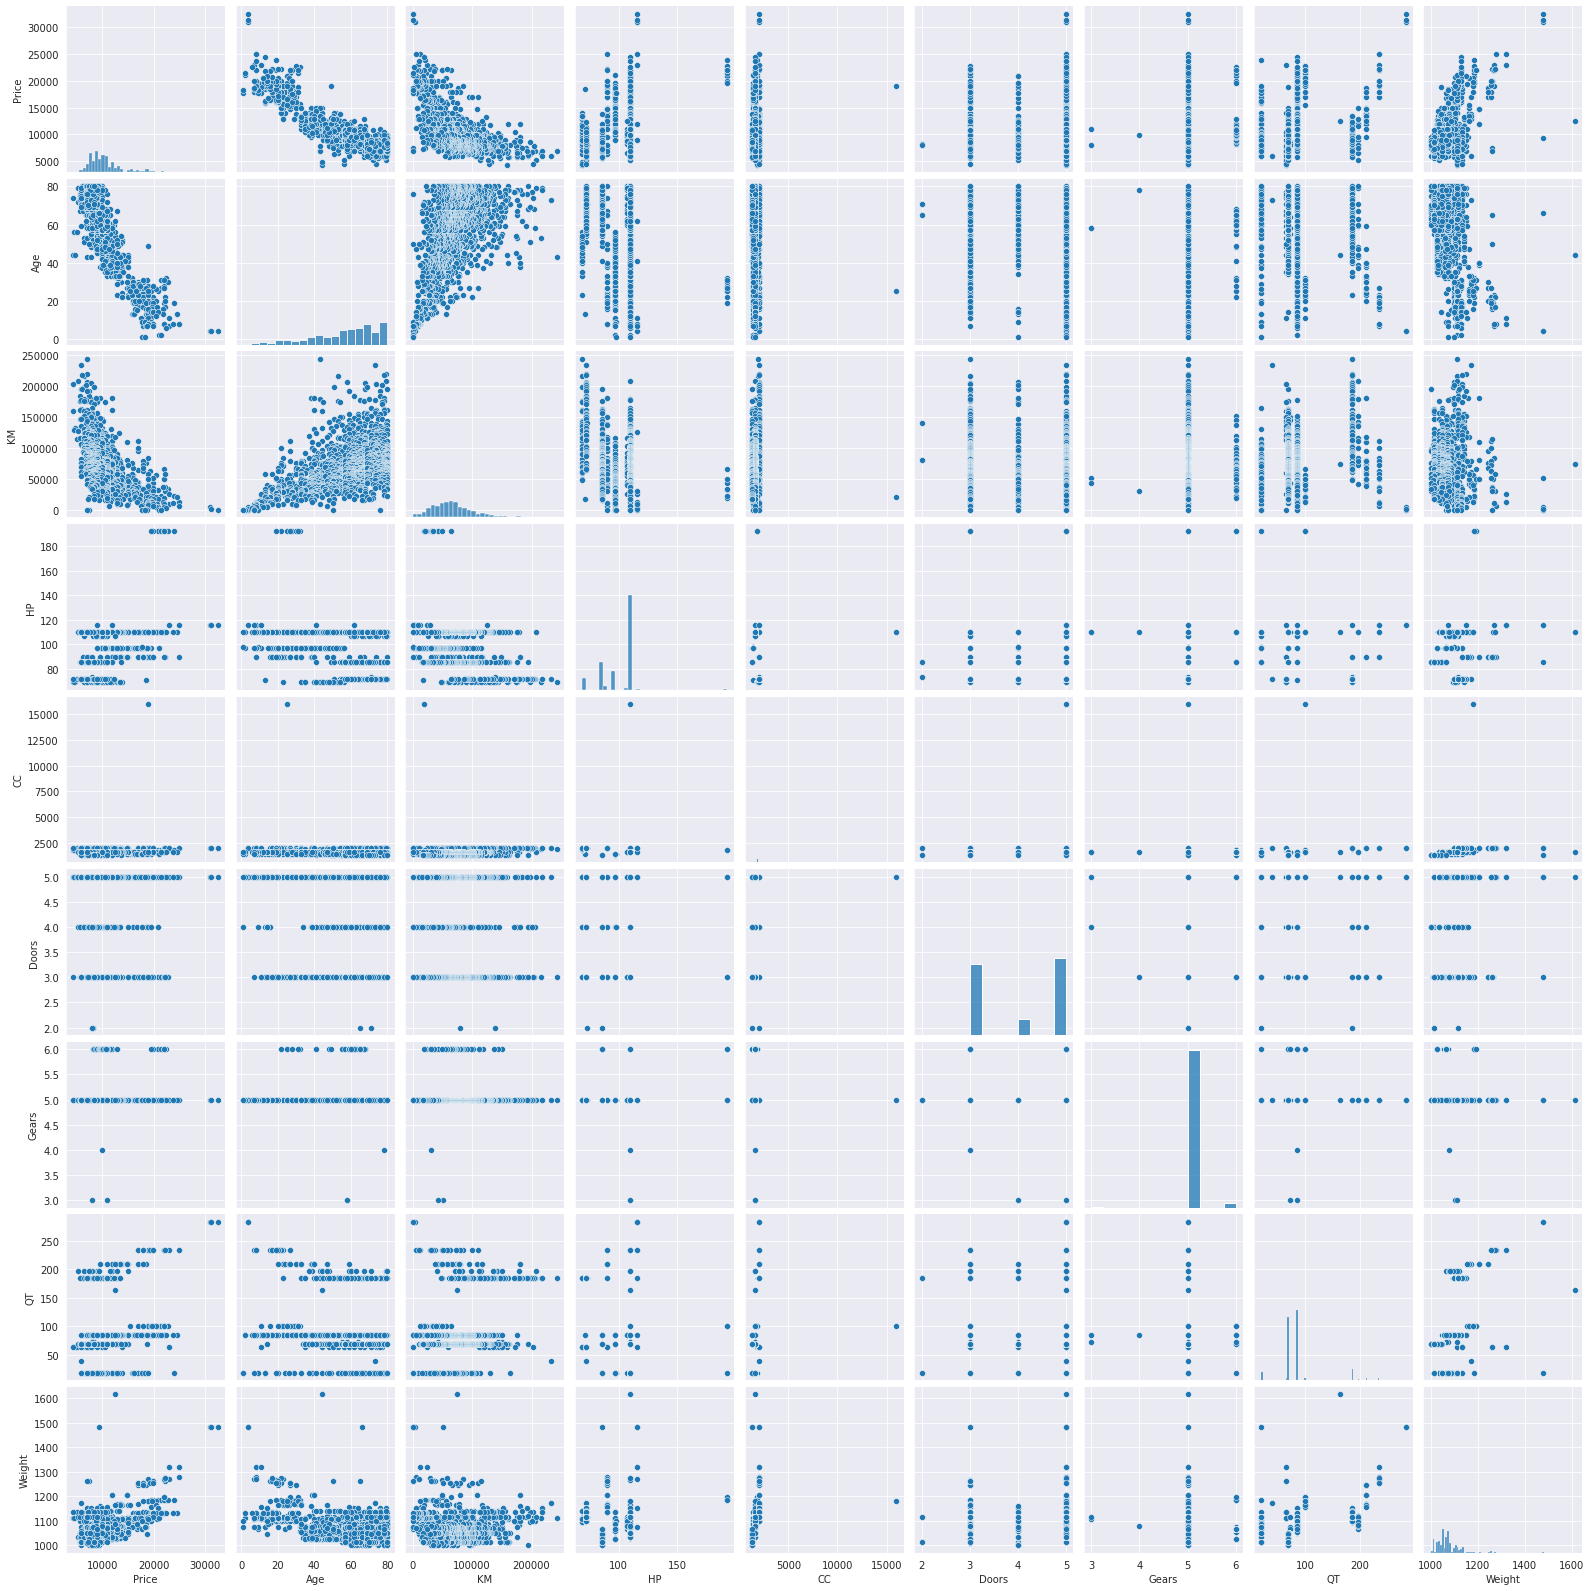

In [ ]:
sns.set_style(style = 'darkgrid')
sns.pairplot(imp_data)
plt.show()

In [ ]:
#Model Building || 5. Model Training

In [ ]:
car_model = smf.ols(formula = 'Price~Age+KM+HP+CC+Doors+Gears+QT+Weight', data = imp_data).fit()
print('R2Score     :',car_model.rsquared.round(4)) 
print('Adj.R2Score :',car_model.rsquared_adj.round(4))
print('AIC Value   :',car_model.aic.round(4)) 
print('BIC Value   :',car_model.bic.round(4)) 
print('P-Value     :\n',car_model.pvalues)
print('t-value     :\n',car_model.tvalues)

R2Score     : 0.8625
Adj.R2Score : 0.8617
AIC Value   : 24750.4072
BIC Value   : 24797.8275
P-Value     :
 Intercept     1.113392e-04
Age          1.879217e-288
KM            1.994713e-56
HP            5.211155e-28
CC            1.882393e-01
Doors         9.816443e-01
Gears         2.452430e-03
QT            3.290363e-03
Weight        1.031118e-51
dtype: float64
t-value     :
 Intercept    -3.875273
Age         -46.551876
KM          -16.552424
HP           11.209719
CC           -1.316436
Doors        -0.023012
Gears         3.034563
QT            2.944198
Weight       15.760663
dtype: float64


In [ ]:
car_model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

In [ ]:
car_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1491.
Date:                Wed, 19 Oct 2022   Prob (F-statistic):               0.00
Time:                        19:14:28   Log-Likelihood:                -11047.
No. Observations:                1331   AIC:                         2.211e+04
Df Residuals:                    1322   BIC:                         2.216e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.868e+04   1514.204    -12.337      0.000   -2.17e+04   -1.57e+04
Age         -108.1969      2.182    -49.583      0.000    -112.478    -103.916
KM            -0.0154      0.001    -14.758      0.000      -0.017      -0.013
HP             7.8012      3.040      2.566      0.010       1.838      13.764
CC            -2.2782      0.292     -7.810      0.000      -2.850      -1.706
Doors       -146.9605     32.437     -4.531      0.000    -210.593     -83.328
Gears        254.4748    163.691      1.555      0.120     -66.648     575.598
QT           -11.7868      1.625     -7.253      0.000     -14.975      -8.599
Weight        37.0127      1.447     25.571      0.000      34.173      39.852
==============================================================================
Omnibus:                        5.483   Durbin-Watson:                   1.823
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                5.493
Skew:                           0.157   Prob(JB):                       0.0641
Kurtosis:                       2.990   Cond. No.                     4.34e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.34e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Model 1:

In [ ]:
car_model_1 = smf.ols(formula = 'Price~Age', data = imp_data).fit()
print('R2Score     :',car_model_1.rsquared.round(4)) 
print('Adj.R2Score :',car_model_1.rsquared_adj.round(4))
print('AIC Value   :',car_model_1.aic.round(4)) 
print('BIC Value   :',car_model_1.bic.round(4)) 
print('P-Value     :\n',car_model_1.pvalues)
print('t-value     :\n',car_model_1.tvalues)

R2Score     : 0.7679
Adj.R2Score : 0.7677
AIC Value   : 25488.1804
BIC Value   : 25498.7182
P-Value     :
 Intercept    0.0
Age          0.0
dtype: float64
t-value     :
 Intercept    138.818198
Age          -68.846693
dtype: float64


In [ ]:
car_model_1.params

Intercept    20257.120773
Age           -170.348732
dtype: float64

In [ ]:
car_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     4740.
Date:                Wed, 19 Oct 2022   Prob (F-statistic):               0.00
Time:                        19:15:09   Log-Likelihood:                -12742.
No. Observations:                1435   AIC:                         2.549e+04
Df Residuals:                    1433   BIC:                         2.550e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.026e+04    145.926    138.818      0.000       2e+04    2.05e+04
Age         -170.3487      2.474    -68.847      0.000    -175.202    -165.495
==============================================================================
Omnibus:                      363.006   Durbin-Watson:                   1.223
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2878.814
Skew:                           0.951   Prob(JB):                         0.00
Kurtosis:                       9.673   Cond. No.                         187.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Model 2:

In [ ]:
car_model_2 = smf.ols(formula = 'Price~Age+KM', data = imp_data).fit()
print('R2Score     :',car_model_2.rsquared.round(4)) 
print('Adj.R2Score :',car_model_2.rsquared_adj.round(4))
print('AIC Value   :',car_model_2.aic.round(4)) 
print('BIC Value   :',car_model_2.bic.round(4)) 
print('P-Value     :\n',car_model_2.pvalues)
print('t-value     :\n',car_model_2.tvalues)

R2Score     : 0.7896
Adj.R2Score : 0.7893
AIC Value   : 25349.1378
BIC Value   : 25364.9445
P-Value     :
 Intercept    0.000000e+00
Age          0.000000e+00
KM           1.872211e-32
dtype: float64
t-value     :
 Intercept    146.207406
Age          -56.276050
KM           -12.161288
dtype: float64


In [ ]:
car_model_2.params

Intercept    20446.529031
Age           -153.600326
KM              -0.016435
dtype: float64

In [ ]:
car_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     2687.
Date:                Wed, 19 Oct 2022   Prob (F-statistic):               0.00
Time:                        19:15:27   Log-Likelihood:                -12672.
No. Observations:                1435   AIC:                         2.535e+04
Df Residuals:                    1432   BIC:                         2.536e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.045e+04    139.846    146.207      0.000    2.02e+04    2.07e+04
Age         -153.6003      2.729    -56.276      0.000    -158.954    -148.246
KM            -0.0164      0.001    -12.161      0.000      -0.019      -0.014
==============================================================================
Omnibus:                      453.671   Durbin-Watson:                   1.302
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3455.391
Skew:                           1.259   Prob(JB):                         0.00
Kurtosis:                      10.173   Cond. No.                     2.50e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Model 3:

In [ ]:
car_model_3 = smf.ols(formula = 'Price~Age+KM+HP', data = imp_data).fit()
print('R2Score     :',car_model_3.rsquared.round(4)) 
print('Adj.R2Score :',car_model_3.rsquared_adj.round(4))
print('AIC Value   :',car_model_3.aic.round(4)) 
print('BIC Value   :',car_model_3.bic.round(4)) 
print('P-Value     :\n',car_model_3.pvalues)
print('t-value     :\n',car_model_3.tvalues)

R2Score     : 0.81
Adj.R2Score : 0.8096
AIC Value   : 25204.9648
BIC Value   : 25226.0404
P-Value     :
 Intercept    1.163480e-291
Age           0.000000e+00
KM            4.247724e-17
HP            1.498414e-33
dtype: float64
t-value     :
 Intercept    46.907677
Age         -59.381611
KM           -8.512207
HP           12.387422
dtype: float64


In [ ]:
car_model_3.params

Intercept    16431.852801
Age           -154.101081
KM              -0.011459
HP              36.470349
dtype: float64

In [ ]:
car_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     2033.
Date:                Wed, 19 Oct 2022   Prob (F-statistic):               0.00
Time:                        19:15:47   Log-Likelihood:                -12598.
No. Observations:                1435   AIC:                         2.520e+04
Df Residuals:                    1431   BIC:                         2.523e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.643e+04    350.302     46.908      0.000    1.57e+04    1.71e+04
Age         -154.1011      2.595    -59.382      0.000    -159.192    -149.010
KM            -0.0115      0.001     -8.512      0.000      -0.014      -0.009
HP            36.4703      2.944     12.387      0.000      30.695      42.246
==============================================================================
Omnibus:                      421.706   Durbin-Watson:                   1.361
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3120.040
Skew:                           1.163   Prob(JB):                         0.00
Kurtosis:                       9.839   Cond. No.                     6.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Model 4:

In [ ]:
car_model_4 = smf.ols(formula = 'Price~Age+KM+HP+CC', data = imp_data).fit()
print('R2Score     :',car_model_4.rsquared.round(4)) 
print('Adj.R2Score :',car_model_4.rsquared_adj.round(4))
print('AIC Value   :',car_model_4.aic.round(4)) 
print('BIC Value   :',car_model_4.bic.round(4)) 
print('P-Value     :\n',car_model_4.pvalues)
print('t-value     :\n',car_model_4.tvalues)

R2Score     : 0.8131
Adj.R2Score : 0.8126
AIC Value   : 25182.9236
BIC Value   : 25209.2682
P-Value     :
 Intercept    2.138082e-251
Age           0.000000e+00
KM            2.817815e-20
HP            5.509435e-32
CC            9.892058e-07
dtype: float64
t-value     :
 Intercept    41.949661
Age         -58.074635
KM           -9.366347
HP           12.064122
CC            4.915200
dtype: float64


In [ ]:
car_model_4.params

Intercept    15737.159456
Age           -151.850604
KM              -0.012746
HP              35.343015
CC               0.489289
dtype: float64

In [ ]:
car_model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     1556.
Date:                Wed, 19 Oct 2022   Prob (F-statistic):               0.00
Time:                        18:57:30   Log-Likelihood:                -12586.
No. Observations:                1435   AIC:                         2.518e+04
Df Residuals:                    1430   BIC:                         2.521e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.574e+04    375.144     41.950      0.000     1.5e+04    1.65e+04
Age         -151.8506      2.615    -58.075      0.000    -156.980    -146.721
KM            -0.0127      0.001     -9.366      0.000      -0.015      -0.010
HP            35.3430      2.930     12.064      0.000      29.596      41.090
CC             0.4893      0.100      4.915      0.000       0.294       0.685
==============================================================================
Omnibus:                      404.525   Durbin-Watson:                   1.364
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2991.152
Skew:                           1.107   Prob(JB):                         0.00
Kurtosis:                       9.717   Cond. No.                     7.11e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Model 5:

In [ ]:
car_model_5 = smf.ols(formula = 'Price~Age+KM+HP+CC+Doors', data = imp_data).fit()
print('R2Score     :',car_model_5.rsquared.round(4)) 
print('Adj.R2Score :',car_model_5.rsquared_adj.round(4))
print('AIC Value   :',car_model_5.aic.round(4)) 
print('BIC Value   :',car_model_5.bic.round(4)) 
print('P-Value     :\n',car_model_5.pvalues)
print('t-value     :\n',car_model_5.tvalues)

R2Score     : 0.8153
Adj.R2Score : 0.8147
AIC Value   : 25167.8983
BIC Value   : 25199.5119
P-Value     :
 Intercept    2.172473e-212
Age           0.000000e+00
KM            2.268570e-21
HP            1.865347e-30
CC            2.598106e-06
Doors         3.841464e-05
dtype: float64
t-value     :
 Intercept    37.199697
Age         -57.238964
KM           -9.645230
HP           11.741326
CC            4.719332
Doors         4.129776
dtype: float64


In [ ]:
car_model_5.params

Intercept    15081.612166
Age           -150.325653
KM              -0.013075
HP              34.327501
CC               0.467820
Doors          180.932794
dtype: float64

In [ ]:
car_model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     1262.
Date:                Wed, 19 Oct 2022   Prob (F-statistic):               0.00
Time:                        19:16:25   Log-Likelihood:                -12578.
No. Observations:                1435   AIC:                         2.517e+04
Df Residuals:                    1429   BIC:                         2.520e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.508e+04    405.423     37.200      0.000    1.43e+04    1.59e+04
Age         -150.3257      2.626    -57.239      0.000    -155.477    -145.174
KM            -0.0131      0.001     -9.645      0.000      -0.016      -0.010
HP            34.3275      2.924     11.741      0.000      28.592      40.063
CC             0.4678      0.099      4.719      0.000       0.273       0.662
Doors        180.9328     43.812      4.130      0.000      94.991     266.875
==============================================================================
Omnibus:                      400.723   Durbin-Watson:                   1.352
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3000.146
Skew:                           1.091   Prob(JB):                         0.00
Kurtosis:                       9.739   Cond. No.                     7.73e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.73e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Model 6:

In [ ]:
car_model_6 = smf.ols(formula = 'Price~Age+KM+HP+CC+Doors+Gears', data = imp_data).fit()
print('R2Score     :',car_model_6.rsquared.round(4)) 
print('Adj.R2Score :',car_model_6.rsquared_adj.round(4))
print('AIC Value   :',car_model_6.aic.round(4)) 
print('BIC Value   :',car_model_6.bic.round(4)) 
print('P-Value     :\n',car_model_6.pvalues)
print('t-value     :\n',car_model_6.tvalues)

R2Score     : 0.8169
Adj.R2Score : 0.8162
AIC Value   : 25157.2601
BIC Value   : 25194.1426
P-Value     :
 Intercept    4.035386e-21
Age          0.000000e+00
KM           8.682544e-23
HP           4.008117e-25
CC           2.482003e-06
Doors        2.292852e-06
Gears        3.915360e-04
dtype: float64
t-value     :
 Intercept     9.582220
Age         -57.237648
KM           -9.996473
HP           10.553446
CC            4.728783
Doors         4.745107
Gears         3.554167
dtype: float64


In [ ]:
car_model_6.params

Intercept    11187.922843
Age           -149.883404
KM              -0.013567
HP              31.702701
CC               0.466862
Doors          210.873999
Gears          805.700276
dtype: float64

In [ ]:
car_model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     1062.
Date:                Wed, 19 Oct 2022   Prob (F-statistic):               0.00
Time:                        19:16:44   Log-Likelihood:                -12572.
No. Observations:                1435   AIC:                         2.516e+04
Df Residuals:                    1428   BIC:                         2.519e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.119e+04   1167.571      9.582      0.000    8897.584    1.35e+04
Age         -149.8834      2.619    -57.238      0.000    -155.020    -144.747
KM            -0.0136      0.001     -9.996      0.000      -0.016      -0.011
HP            31.7027      3.004     10.553      0.000      25.810      37.595
CC             0.4669      0.099      4.729      0.000       0.273       0.661
Doors        210.8740     44.440      4.745      0.000     123.699     298.049
Gears        805.7003    226.692      3.554      0.000     361.016    1250.385
==============================================================================
Omnibus:                      410.365   Durbin-Watson:                   1.348
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3172.449
Skew:                           1.112   Prob(JB):                         0.00
Kurtosis:                       9.936   Cond. No.                     2.27e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Model 7:

In [ ]:
car_model_7 = smf.ols(formula = 'Price~Age+KM+HP+CC+Doors+Gears+QT', data = imp_data).fit()
print('R2Score     :',car_model_7.rsquared.round(4)) 
print('Adj.R2Score :',car_model_7.rsquared_adj.round(4))
print('AIC Value   :',car_model_7.aic.round(4)) 
print('BIC Value   :',car_model_7.bic.round(4)) 
print('P-Value     :\n',car_model_7.pvalues)
print('t-value     :\n',car_model_7.tvalues)

R2Score     : 0.8386
Adj.R2Score : 0.8378
AIC Value   : 24978.8405
BIC Value   : 25020.9918
P-Value     :
 Intercept    3.508211e-19
Age          0.000000e+00
KM           9.698798e-46
HP           1.062529e-45
CC           2.600082e-01
Doors        1.790839e-04
Gears        3.428430e-03
QT           6.714076e-41
dtype: float64
t-value     :
 Intercept     9.080227
Age         -51.483443
KM          -14.715002
HP           14.707893
CC            1.126820
Doors         3.756724
Gears         2.931372
QT           13.826801
dtype: float64


In [ ]:
car_model_7.params

Intercept    9990.346944
Age          -136.329989
KM             -0.019954
HP             43.299681
CC              0.108511
Doors         157.501801
Gears         625.417056
QT             15.929782
dtype: float64

In [ ]:
car_model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     1059.
Date:                Wed, 19 Oct 2022   Prob (F-statistic):               0.00
Time:                        19:17:08   Log-Likelihood:                -12481.
No. Observations:                1435   AIC:                         2.498e+04
Df Residuals:                    1427   BIC:                         2.502e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9990.3469   1100.231      9.080      0.000    7832.103    1.21e+04
Age         -136.3300      2.648    -51.483      0.000    -141.524    -131.136
KM            -0.0200      0.001    -14.715      0.000      -0.023      -0.017
HP            43.2997      2.944     14.708      0.000      37.525      49.075
CC             0.1085      0.096      1.127      0.260      -0.080       0.297
Doors        157.5018     41.925      3.757      0.000      75.260     239.744
Gears        625.4171    213.353      2.931      0.003     206.898    1043.936
QT            15.9298      1.152     13.827      0.000      13.670      18.190
==============================================================================
Omnibus:                      218.215   Durbin-Watson:                   1.374
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              813.088
Skew:                           0.705   Prob(JB):                    2.75e-177
Kurtosis:                       6.408   Cond. No.                     2.28e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.28e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Model 8:

In [ ]:
car_model_8 = smf.ols(formula = 'Price~Age+KM+HP+CC+Doors+Gears+QT+Weight', data = imp_data).fit()
print('R2Score     :',car_model_8.rsquared.round(4)) 
print('Adj.R2Score :',car_model_8.rsquared_adj.round(4))
print('AIC Value   :',car_model_8.aic.round(4)) 
print('BIC Value   :',car_model_8.bic.round(4)) 
print('P-Value     :\n',car_model_8.pvalues)
print('t-value     :\n',car_model_8.tvalues)

R2Score     : 0.8625
Adj.R2Score : 0.8617
AIC Value   : 24750.4072
BIC Value   : 24797.8275
P-Value     :
 Intercept     1.113392e-04
Age          1.879217e-288
KM            1.994713e-56
HP            5.211155e-28
CC            1.882393e-01
Doors         9.816443e-01
Gears         2.452430e-03
QT            3.290363e-03
Weight        1.031118e-51
dtype: float64
t-value     :
 Intercept    -3.875273
Age         -46.551876
KM          -16.552424
HP           11.209719
CC           -1.316436
Doors        -0.023012
Gears         3.034563
QT            2.944198
Weight       15.760663
dtype: float64


In [ ]:
car_model_8.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

In [ ]:
car_model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Wed, 19 Oct 2022   Prob (F-statistic):               0.00
Time:                        18:30:34   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
CC            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
QT             3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Measuring Variance Inflation Factor (VIF) :

In [ ]:
Rsq_age = smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',data = imp_data).fit().rsquared
VIF_age = 1/(1-Rsq_age)

Rsq_KM = smf.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight',data = imp_data).fit().rsquared
VIF_KM = 1/(1-Rsq_KM)

Rsq_HP = smf.ols('HP~Age+KM+CC+Doors+Gears+QT+Weight',data = imp_data).fit().rsquared
VIF_HP = 1/(1-Rsq_HP)
 
Rsq_CC = smf.ols('CC~Age+KM+HP+Doors+Gears+QT+Weight',data = imp_data).fit().rsquared
VIF_CC = 1/(1-Rsq_CC)

Rsq_DR = smf.ols('Doors~Age+KM+HP+CC+Gears+QT+Weight',data = imp_data).fit().rsquared
VIF_DR = 1/(1-Rsq_DR)

Rsq_GR = smf.ols('Gears~Age+KM+HP+CC+Doors+QT+Weight',data = imp_data).fit().rsquared
VIF_GR = 1/(1-Rsq_GR)

Rsq_QT = smf.ols('QT~Age+KM+HP+CC+Doors+Gears+Weight',data = imp_data).fit().rsquared
VIF_QT = 1/(1-Rsq_QT)

Rsq_WT = smf.ols('Weight~Age+KM+HP+CC+Doors+Gears+QT',data = imp_data).fit().rsquared
VIF_WT = 1/(1-Rsq_WT)

In [ ]:
# Putting the values in Dataframe format
d1 = {'Variables':['Age','KM','HP','CC','Doors','Gears','QT','Weight'],
    'VIF':[VIF_age,VIF_KM,VIF_HP,VIF_CC,VIF_DR,VIF_GR,VIF_QT,VIF_WT]}
VIF_df = pd.DataFrame(d1)
VIF_df

In [ ]:
#Model Testing - Residual Analysis

In [ ]:
#Normality of Residuals (Q-Q plot):

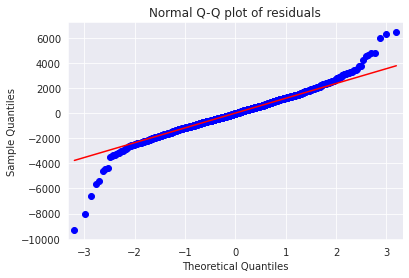

In [ ]:
sm.qqplot(car_model.resid , line = 'q' )
plt.title('Normal Q-Q plot of residuals')
plt.show()

In [ ]:
list(np.where(car_model.resid > 6000))

[array([109, 146, 522])]

In [ ]:
# Residual Plot for Homoscedasticity:

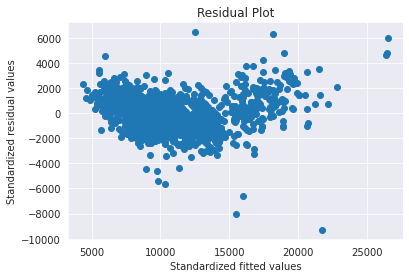

In [ ]:
plt.scatter((car_model.fittedvalues),(car_model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [ ]:
#Residual Vs Regressors:

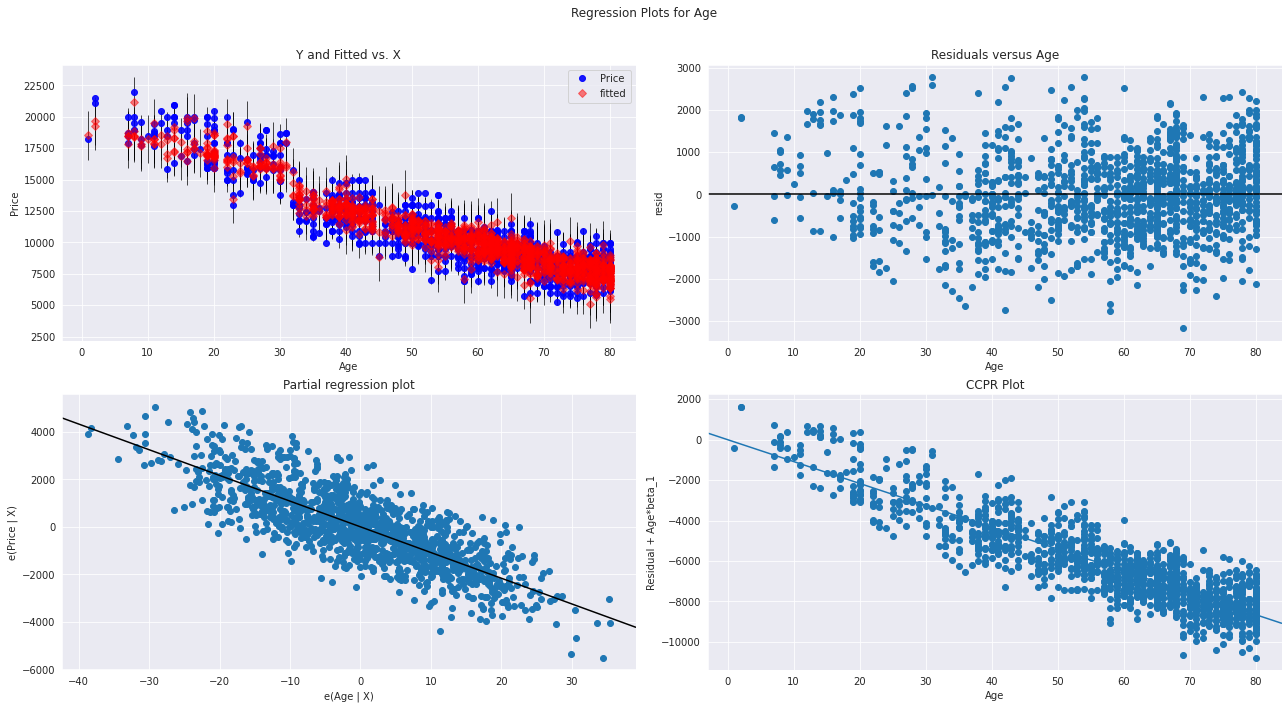

In [ ]:
figsize = plt.figure(figsize = (18,10))
figsize = sm.graphics.plot_regress_exog(car_model,'Age',fig = figsize)
plt.show()

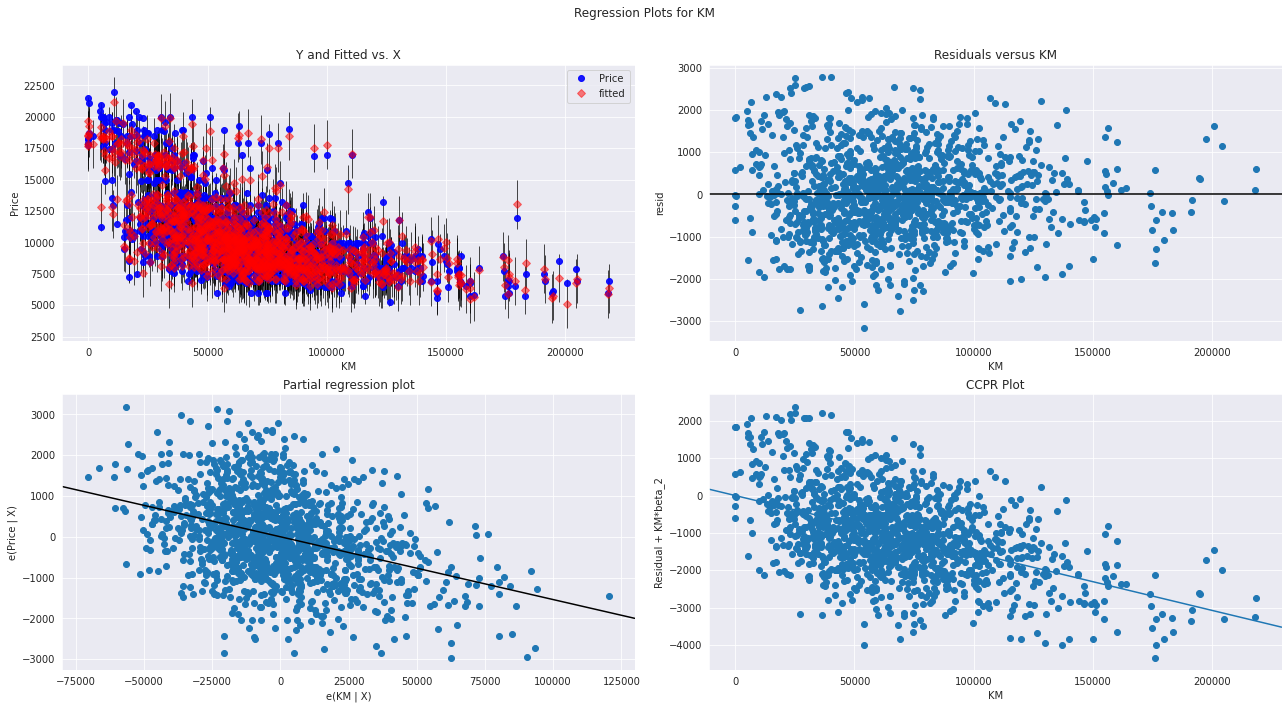

In [ ]:
figsize = plt.figure(figsize = (18,10))
figsize = sm.graphics.plot_regress_exog(car_model,'KM',fig = figsize)
plt.show()

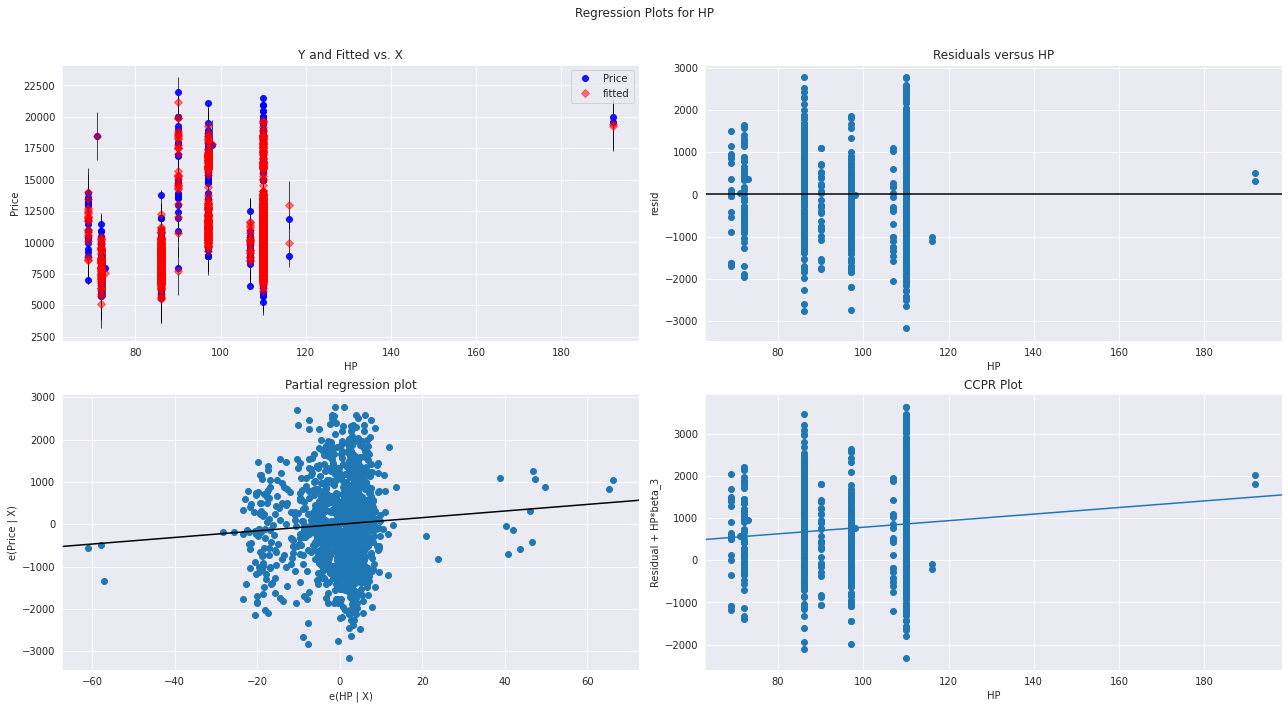

In [ ]:
figsize = plt.figure(figsize = (18,10))
figsize = sm.graphics.plot_regress_exog(car_model,'HP',fig = figsize)
plt.show()

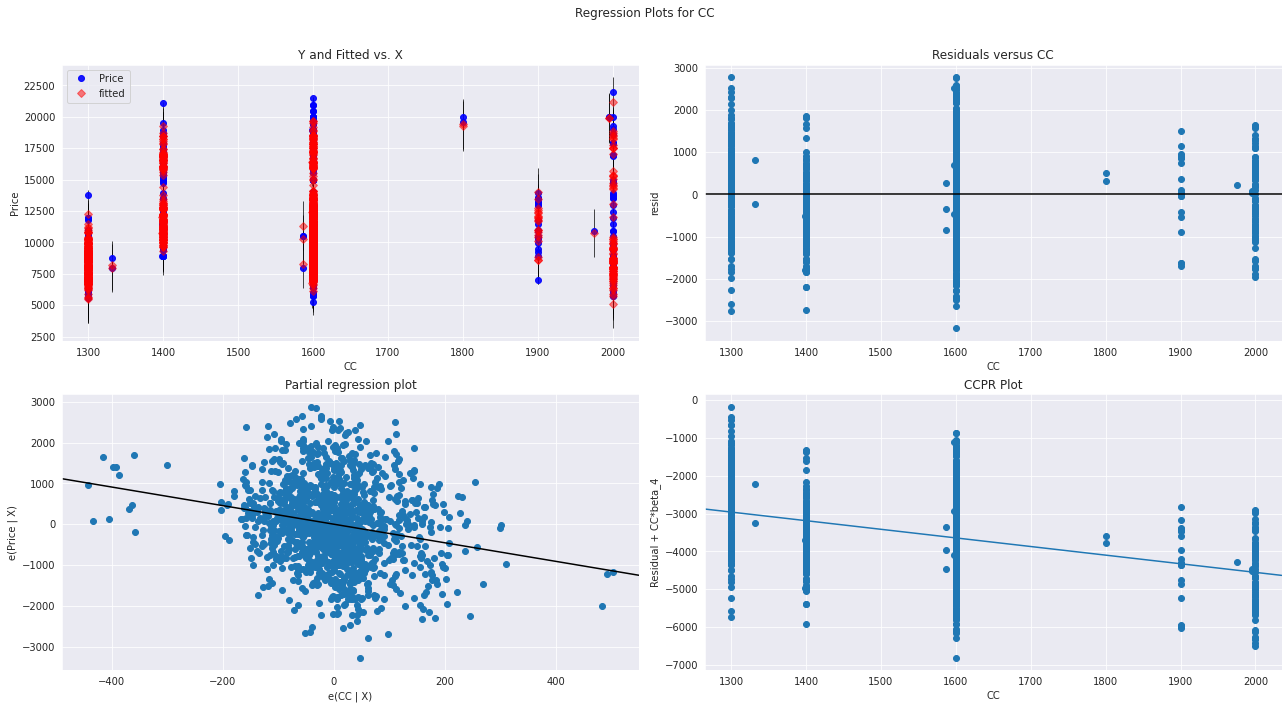

In [ ]:
figsize = plt.figure(figsize = (18,10))
figsize = sm.graphics.plot_regress_exog(car_model,'CC',fig = figsize)
plt.show()

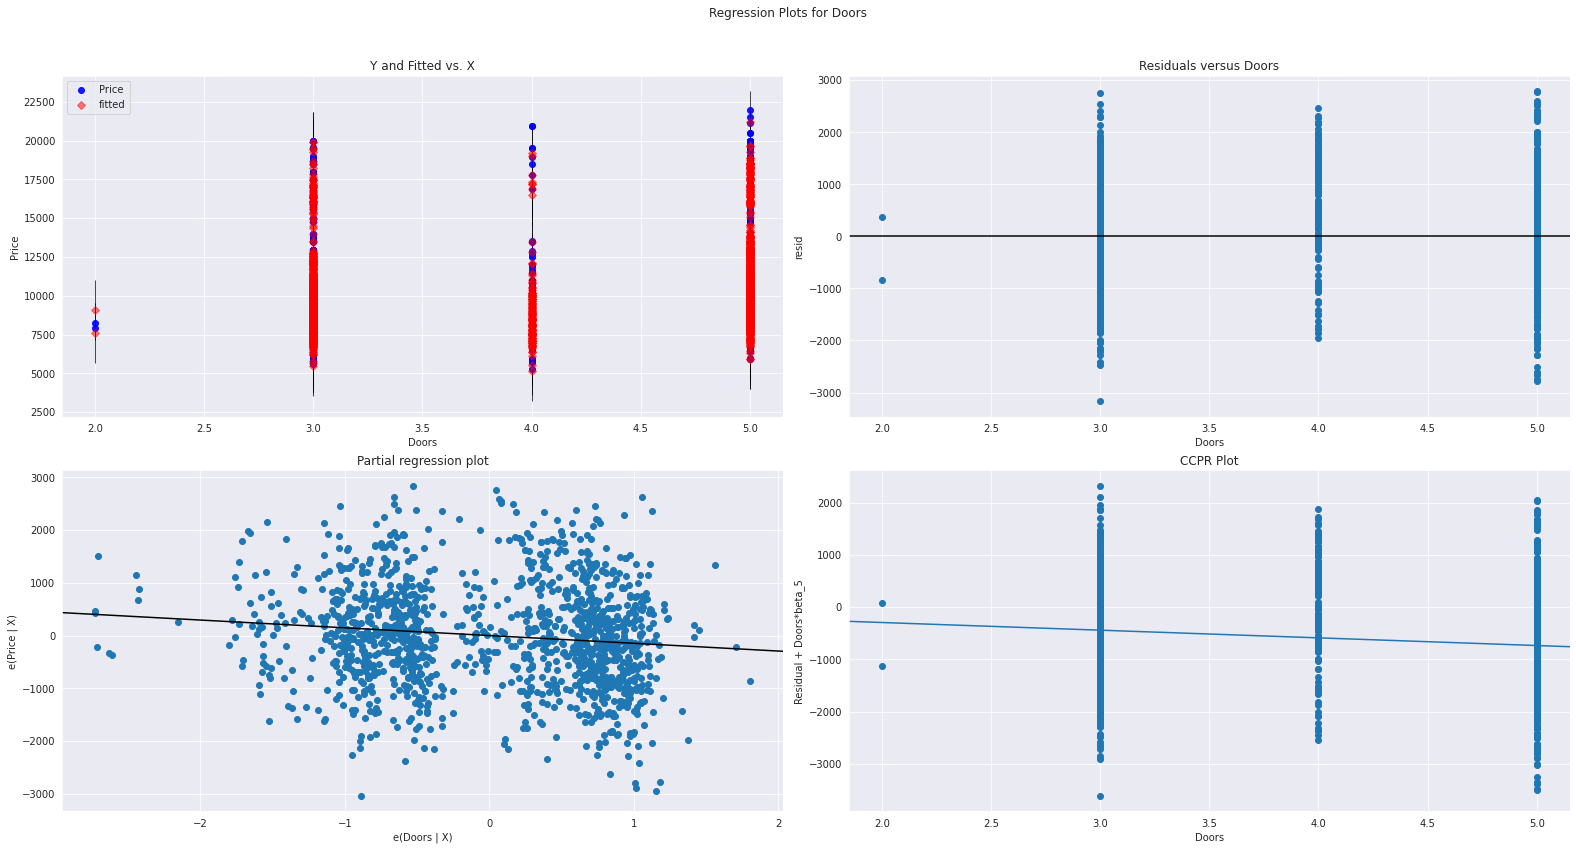

In [ ]:
figsize = plt.figure(figsize = (22,12))
figsize = sm.graphics.plot_regress_exog(car_model,'Doors',fig = figsize)
plt.show()

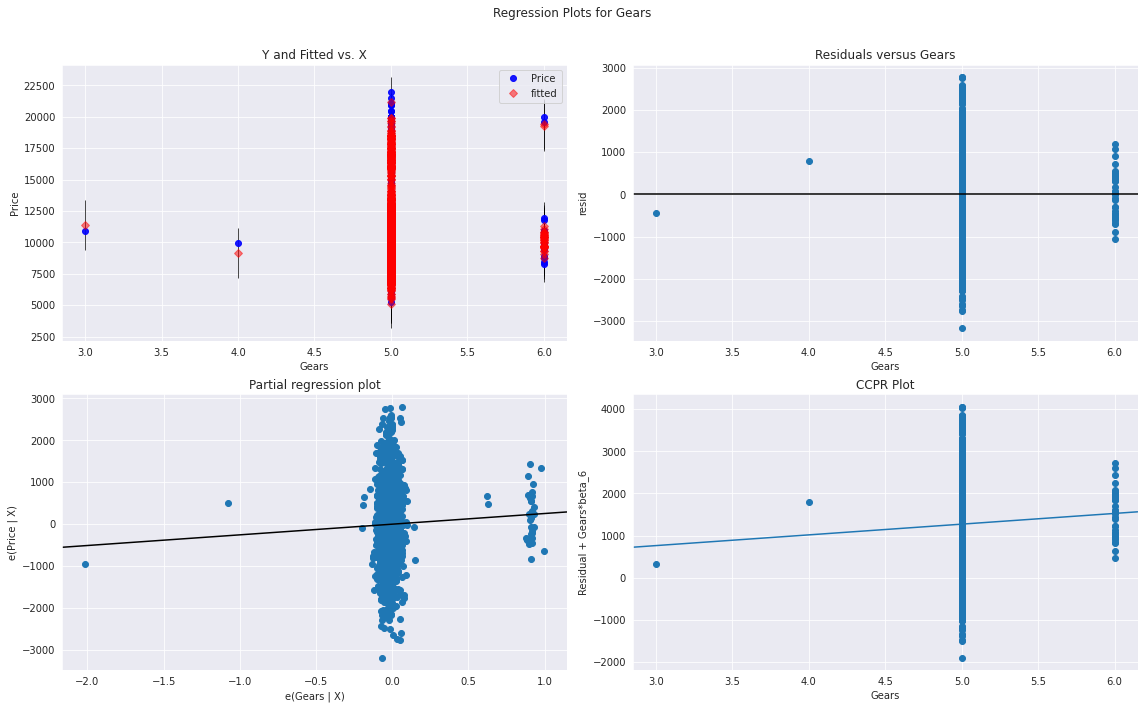

In [ ]:
figsize = plt.figure(figsize = (16,10))
figsize = sm.graphics.plot_regress_exog(car_model,'Gears',fig = figsize)
plt.show()

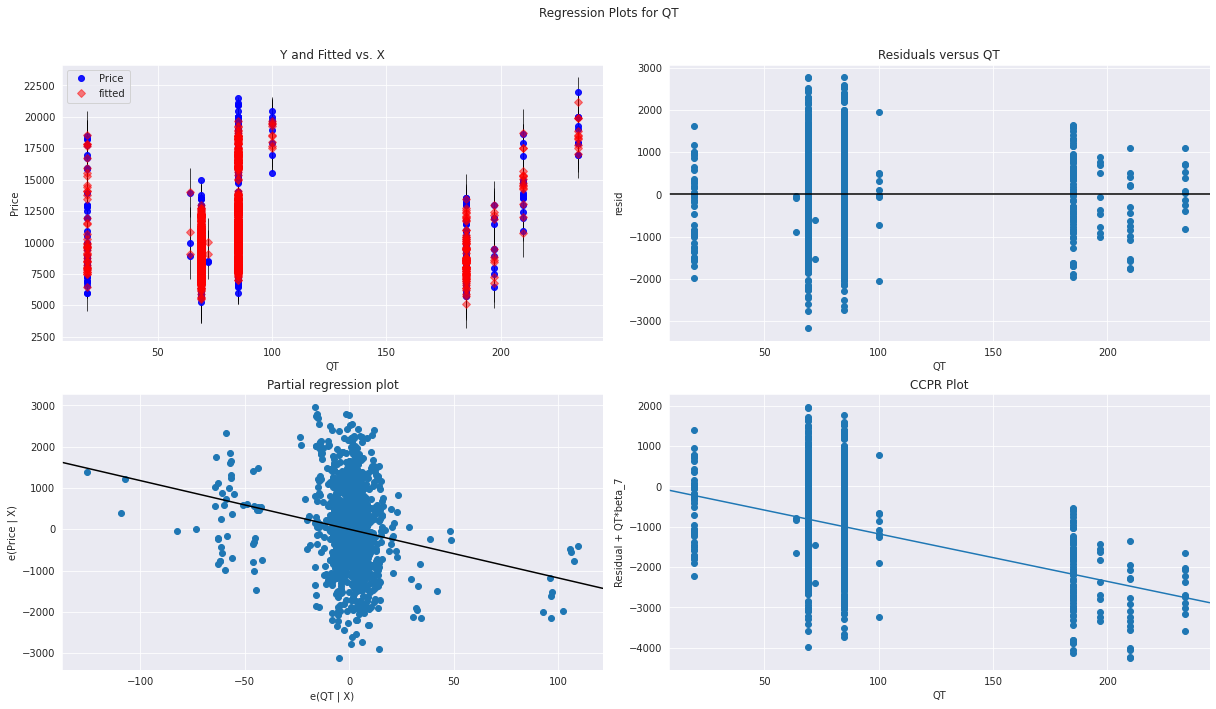

In [ ]:
figsize = plt.figure(figsize = (17,10))
figsize = sm.graphics.plot_regress_exog(car_model,'QT',fig = figsize)
plt.show()

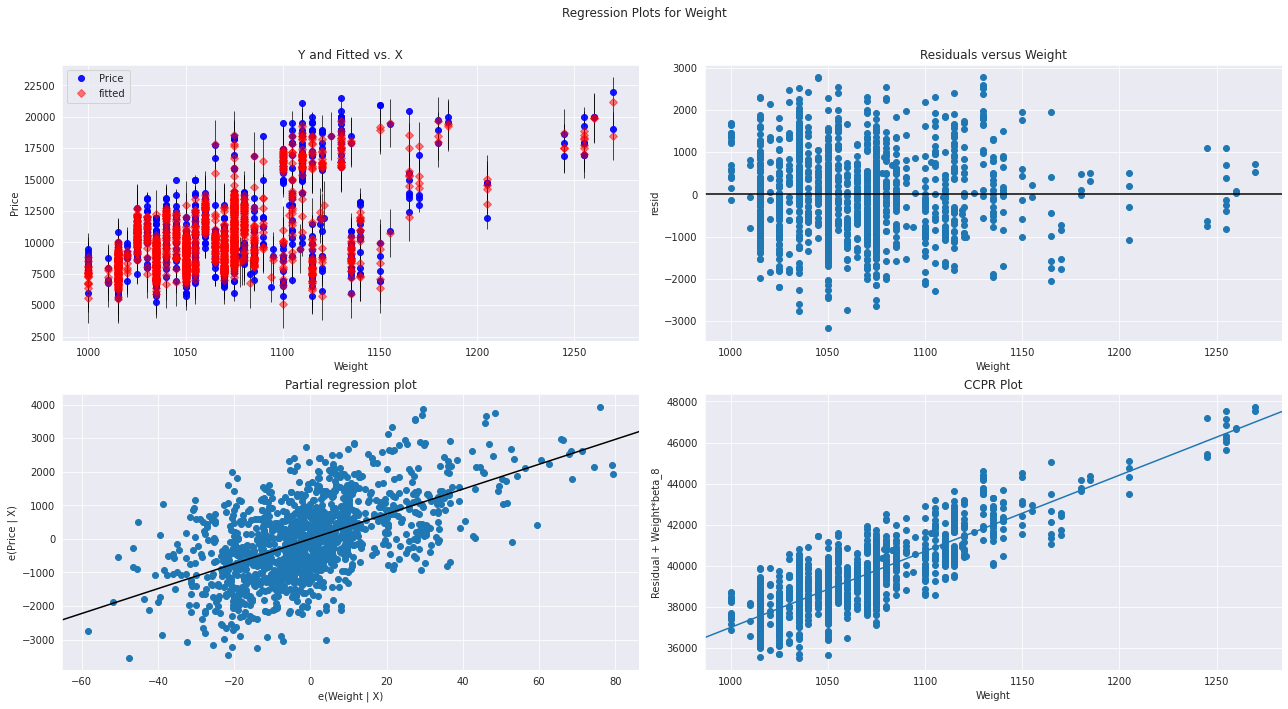

In [ ]:
figsize = plt.figure(figsize = (18,10))
figsize = sm.graphics.plot_regress_exog(car_model,'Weight',fig = figsize)
plt.show()

In [ ]:
#Model Deletion Dignostics:

In [ ]:
#Using Cook's Distance

In [ ]:
car_model_influencers = car_model.get_influence()
(a,_) = car_model_influencers.cooks_distance
a

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110551e-07, 6.99854767e-04, 1.08408002e-02])

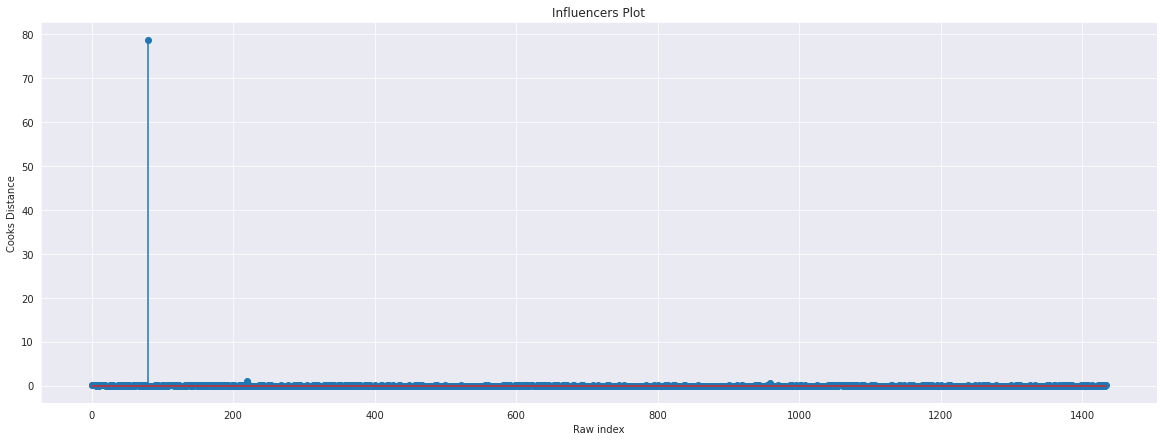

In [ ]:
#Plot the influencers values using stem plot
plt.subplots(figsize = (20,7))
plt.stem(np.arange(len(imp_data)),np.round(a,3))
plt.title('Influencers Plot')
plt.xlabel('Raw index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
#Index and values of influencer
(np.argmax(a), np.max(a))

(80, 78.72950582258927)

In [ ]:
#High Influence Point

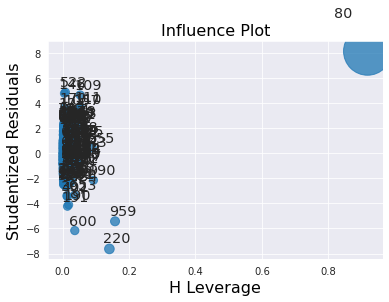

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(car_model)
plt.show()

In [ ]:
k = imp_data.shape[1]
n = imp_data.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [ ]:
leverage_cutoff

0.020905923344947737

In [ ]:
#Checking if there is any improvement in the Rsquare and AIC Value if we drop a row

In [ ]:
copy_1 = imp_data.copy()
copy_1

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
imp_data_2 = copy_1.drop(copy_1.index[[80]],axis = 0).reset_index(drop = True)
imp_data_2

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
imp_data_2.columns

In [ ]:
model1 = smf.ols(formula = 'Price~Age+KM+HP+CC+Doors+Gears+QT+Weight', data = imp_data_2).fit()
model1

In [ ]:
model1.params

In [ ]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1172.
Date:                Wed, 19 Oct 2022   Prob (F-statistic):               0.00
Time:                        18:32:55   Log-Likelihood:                -12326.
No. Observations:                1434   AIC:                         2.467e+04
Df Residuals:                    1425   BIC:                         2.472e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6197.9334   1383.989     -4.478      0.000   -8912.808   -3483.059
Age         -120.5074      2.561    -47.048      0.000    -125.532    -115.483
KM            -0.0178      0.001    -13.931      0.000      -0.020      -0.015
HP            39.2245      2.912     13.470      0.000      33.512      44.937
CC            -2.5088      0.307     -8.162      0.000      -3.112      -1.906
Doors        -26.5129     39.235     -0.676      0.499    -103.478      50.452
Gears        527.1292    192.832      2.734      0.006     148.864     905.395
QT             8.9414      1.427      6.268      0.000       6.143      11.740
Weight        20.0627      1.118     17.944      0.000      17.869      22.256
==============================================================================
Omnibus:                      242.181   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2635.168
Skew:                          -0.427   Prob(JB):                         0.00
Kurtosis:                       9.586   Cond. No.                     3.14e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Final Model:

In [ ]:
while car_model.rsquared < 0.90:
    for a in [np.max(a) > 0.5]:
        car_model = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data = imp_data_2).fit()
        (a,_) = car_model.get_influence().cooks_distance
        a
        np.argmax(a) , np.max(a)
        imp_data_2  =imp_data_2.drop(imp_data_2.index[[np.argmax(a)]],axis = 0).reset_index(drop = True)
        imp_data_2
    else:
        final_model = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data = imp_data_2).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8765926307402282
Thus model accuracy is improved to 0.8839684606741538
Thus model accuracy is improved to 0.8882395145171205
Thus model accuracy is improved to 0.8902571486612915
Thus model accuracy is improved to 0.8909888960319988
Thus model accuracy is improved to 0.8922595280462808
Thus model accuracy is improved to 0.8933621011392295
Thus model accuracy is improved to 0.8947147371605557
Thus model accuracy is improved to 0.8955233405057648
Thus model accuracy is improved to 0.8930210061069088
Thus model accuracy is improved to 0.8939546425147169
Thus model accuracy is improved to 0.8954112430715817
Thus model accuracy is improved to 0.8960182592139027
Thus model accuracy is improved to 0.8968403506948497
Thus model accuracy is improved to 0.8964026771830705
Thus model accuracy is improved to 0.8958538146890626
Thus model accuracy is improved to 0.8953750500147551
Thus model accuracy is improved to 0.8949455651565241
Thus model accuracy is impro

In [ ]:
final_model.params

Intercept   -18635.955416
Age           -108.257335
KM              -0.015465
HP               7.853334
CC              -2.273119
Doors         -149.187276
Gears          251.436316
QT             -11.618726
Weight          36.976781
dtype: float64

In [ ]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1492.
Date:                Wed, 19 Oct 2022   Prob (F-statistic):               0.00
Time:                        18:33:37   Log-Likelihood:                -11038.
No. Observations:                1330   AIC:                         2.209e+04
Df Residuals:                    1321   BIC:                         2.214e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.864e+04   1513.105    -12.316      0.000   -2.16e+04   -1.57e+04
Age         -108.2573      2.181    -49.648      0.000    -112.535    -103.980
KM            -0.0155      0.001    -14.830      0.000      -0.018      -0.013
HP             7.8533      3.037      2.586      0.010       1.895      13.812
CC            -2.2731      0.291     -7.799      0.000      -2.845      -1.701
Doors       -149.1873     32.432     -4.600      0.000    -212.811     -85.563
Gears        251.4363    163.559      1.537      0.124     -69.428     572.301
QT           -11.6187      1.626     -7.144      0.000     -14.809      -8.428
Weight        36.9768      1.446     25.566      0.000      34.139      39.814
==============================================================================
Omnibus:                        5.509   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                5.515
Skew:                           0.158   Prob(JB):                       0.0635
Kurtosis:                       2.993   Cond. No.                     4.34e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.34e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Predicting For New Data:

In [ ]:
newdata = pd.DataFrame({'Age':12,"KM":40000,"HP":80,"CC":1300,"Doors":4,"Gears":5,"QT":69,"Weight":1012},index = [0])
newdata

,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,12,40000,80,1300,4,5,69,1012


In [ ]:
final_model.predict(newdata)

0    14398.815471
dtype: float64

In [ ]:
# hence,final Prediction Price for the final Model is the best price that is  14398.81
#from the Final Model we get to know that after deleting a row we have been updated a new high Rsquare value
# i.e 0.900 than the other models.
#Hence Final Model is Best Model To predict for best price of TOYOTO_Corolla data.